$$ I_i =  \sum_j z_i w_{i,j} z_j / \sum_i z_i z_i $$

where $w_{i,j}$ is a spatial weight, $z_i = y_i - \bar{y}$

In [1]:
%matplotlib inline

In [17]:
import matplotlib.pylab as plt

In [18]:
import pysal
import numpy as np
np.random.seed(12345)

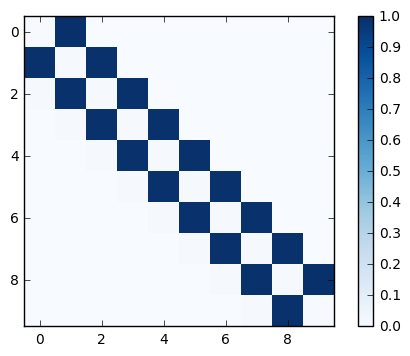

In [19]:
nx = 20
w=pysal.lat2W(nx,nx)

plt.imshow(w.full()[0][:10, :10], interpolation='none',cmap = 'Blues')
plt.colorbar()


#### Kernel weights

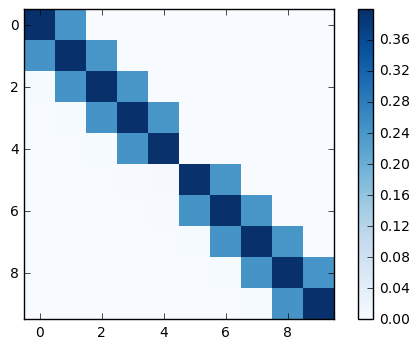

In [20]:
x,y=np.indices((nx,nx))
x.shape=(nx**2,1)
y.shape=(nx**2,1)
data=np.hstack([x,y])
kw = pysal.Kernel(data, fixed = False, function = 'gaussian')

plt.imshow(kw.full()[0][:10, :10], interpolation='none', cmap = 'Blues')
plt.colorbar()

### Example 1

In [21]:
y=np.ones(nx**2)
y[0:nx**2/2]=0

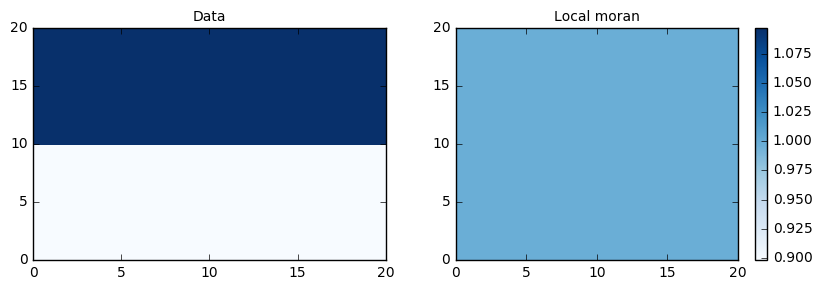

In [22]:
y = y.reshape(nx,nx)
lm = pysal.Moran_Local(y,kw)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.pcolormesh(y, cmap = 'Blues')
plt.title('Data', fontsize = 10)
ax = plt.subplot(122)

plt.title('Local moran', fontsize = 10)
plt.pcolor(lm.Is.reshape((nx,nx)), cmap = 'Blues')
plt.colorbar()


In [23]:
import scipy as sp

def build_checkerboard(w, h) :
    re = np.r_[ w*[0,1] ]              # even-numbered rows
    ro = np.r_[ w*[1,0] ]              # odd-numbered rows
    return np.row_stack(h*(re, ro))


y = build_checkerboard(nx/2, nx/2)

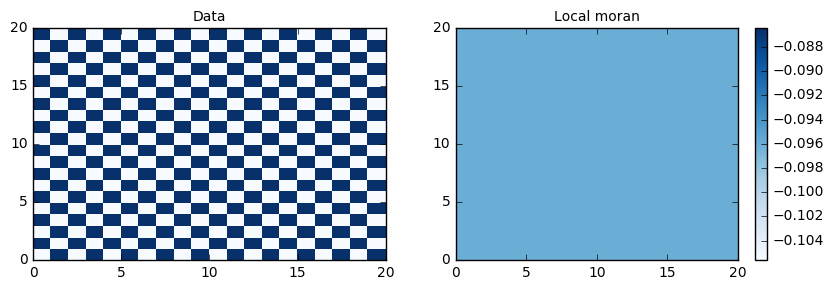

In [24]:
y = y.reshape(nx,nx)
lm = pysal.Moran_Local(y,kw)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.pcolormesh(y, cmap = 'Blues')
plt.title('Data', fontsize = 10)
ax = plt.subplot(122)
plt.title('Local moran', fontsize = 10)
plt.pcolor(lm.Is.reshape((nx,nx)),cmap = 'Blues')
plt.colorbar()


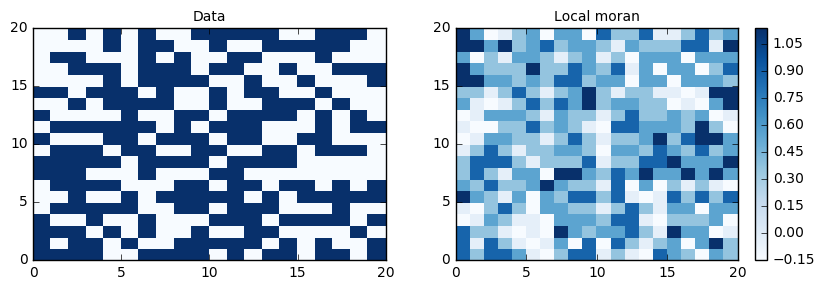

In [25]:
y = sp.randn(nx, nx) > 0

lm = pysal.Moran_Local(y,kw)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.pcolor(np.flipud(y), cmap = 'Blues')
plt.title('Data', fontsize = 10)

ax = plt.subplot(122)
plt.title('Local moran', fontsize = 10)
plt.pcolor(np.flipud(lm.Is.reshape((nx,nx))),cmap = 'Blues')
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx))
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')



### Gaussian

In [26]:
from  scipy.ndimage.filters import gaussian_filter

y = sp.randn(nx, nx) 
z =  gaussian_filter(y, 3, order=2, output=None, mode='reflect', cval=0.0, truncate=20.0)
w=pysal.lat2W(nx,nx)

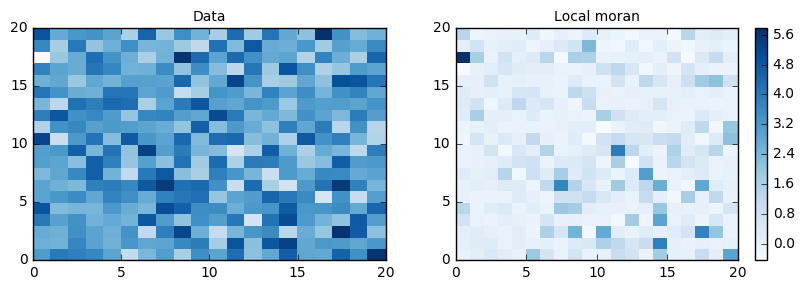

In [27]:
lm = pysal.Moran_Local(y,kw)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.pcolor(np.flipud(y),  cmap = 'Blues')
plt.title('Data', fontsize = 10)

ax = plt.subplot(122)
plt.title('Local moran', fontsize = 10)
plt.pcolor(np.flipud(lm.Is.reshape((nx,nx))),  cmap = 'Blues')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')


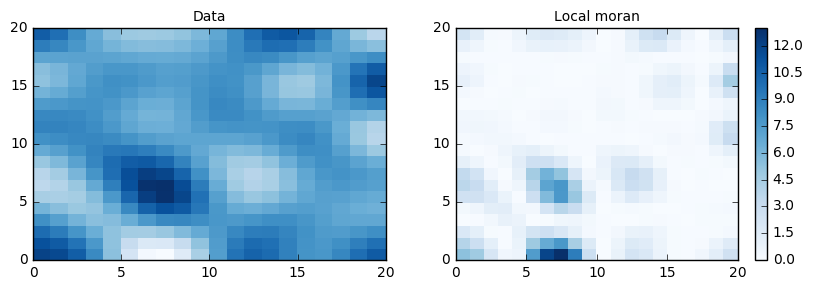

In [28]:

lm = pysal.Moran_Local(z,kw)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.pcolor(np.flipud(z), cmap = 'Blues')
plt.title('Data', fontsize = 10)

ax = plt.subplot(122)
plt.title('Local moran', fontsize = 10)
plt.pcolor(np.flipud(lm.Is.reshape((nx,nx))), cmap = 'Blues')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')

In [14]:
# z = (y - y.mean())
# lisa = [np.sum(z[i]*(z[w.neighbors[i]]*w.weights[i]))/np.sum(z[i]**2) for i in range(len(y))]
# np.array(lisa).reshape(4, 4)
# lm.Is.reshape(nx,nx)